## Создание таблиц



In [1]:
num_clients = 5000000   # 5 mil
num_products = 2000000   # 2 mil
num_orders = 10000000   # 10 mil

#ВНИМАНИЕ! ЗАПУСК ~5 минут

In [2]:
%load_ext sql
%sql sqlite:///bigbase.db
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

### Массивы случайных данных

In [3]:
firstnames = ["Aaliyah", "Aaron", "Abagail", "Abbey", "Abbie", "Abbigail", "Abby", "Abdiel", "Abdul", "Abdullah", "Abe", "Abel", "Abelardo", "Abigail", "Abigale", "Abigayle", "Abner", "Abraham", "Ada", "Adah", "Adaline", "Adam", "Adan", "Addie", "Addison", "Adela", "Adelbert", "Adele", "Adelia", "Adeline", "Adell", "Adella", "Adelle", "Aditya", "Adolf", "Adolfo", "Adolph", "Adolphus", "Adonis", "Adrain", "Adrian", "Adriana", "Adrianna", "Adriel", "Adrien", "Adrienne", "Afton", "Aglae", "Agnes", "Agustin", "Agustina", "Ahmad", "Ahmed", "Aida", "Aidan", "Aiden", "Aileen", "Aimee", "Aisha", "Aiyana", "Akeem", "Al", "Alaina", "Alan", "Alana", "Alanis", "Alanna", "Alayna", "Alba", "Albert", "Alberta", "Albertha", "Alberto", "Albin", "Albina", "Alda", "Alden", "Alec", "Aleen", "Alejandra", "Alejandrin", "Alek", "Alena", "Alessandra", "Alessandro", "Alessia", "Aletha", "Alex", "Alexa", "Alexander", "Alexandra", "Alexandre", "Alexandrea", "Alexandria", "Alexandrine", "Alexane", "Alexanne", "Alexie", "Alexis", "Alexys", "Alexzander", "Alf", "Alfonzo", "Alford", "Alfred", "Alfreda", "Alfredo", "Ali", "Alia", "Alice", "Alicia", "Alisa", "Alisha", "Alison", "Alivia", "Aliya", "Aliza", "Alize", "Allen", "Allie", "Allison", "Ally", "Alphonso", "Alta", "Althea", "Alva", "Alvah", "Alvena", "Alvera", "Alverta", "Alvina", "Alvis", "Alyce", "Alycia", "Alysa", "Alysha", "Alyson", "Alysson", "Amalia", "Amanda", "Amani", "Amara", "Amari", "Amaya", "Amber", "Ambrose", "Amelia", "Amely", "America", "Americo", "Amie", "Amina", "Amir", "Amira", "Amiya", "Amos", "Amparo", "Amy", "Amya", "Ana", "Anabel", "Anabelle", "Anahi", "Anais", "Anastacio", "Anastasia", "Anderson", "Andre", "Andreane", "Andreanne", "Andres", "Andrew", "Andy", "Angel", "Angela", "Angelica", "Angelina", "Angeline", "Angelo", "Angie", "Angus", "Anibal", "Anissa", "Anita", "Aniya", "Aniyah", "Anjali", "Anna", "Annabel", "Annabell", "Annabelle", "Annalise", "Annamae", "Annamarie", "Anne", "Annetta", "Annette", "Annie", "Ansel", "Ansley", "Anthony", "Antoinette", "Antone", "Antonetta", "Antonette", "Antonietta", "Antonina", "Antonio", "Antwan", "Antwon", "Anya", "April", "Ara", "Araceli", "Aracely", "Arch", "Archibald", "Ardella", "Arden", "Ardith", "Ariane", "Arianna", "Aric", "Ariel", "Arielle", "Arjun", "Arlene", "Arlie", "Arlo", "Armand", "Armando", "Armani", "Arnaldo", "Arne", "Arno", "Arnoldo", "Arnulfo", "Aron", "Art", "Arthur", "Arturo", "Arvel", "Arvid", "Arvilla", "Aryanna", "Asa", "Asha", "Ashlee", "Ashleigh", "Ashley", "Ashly", "Ashlynn", "Ashton", "Ashtyn", "Asia", "Assunta", "Astrid", "Athena", "Aubree", "Aubrey", "Audra", "Audreanne", "Audrey", "August", "Augusta", "Augustine", "Augustus", "Aurelia", "Aurelie", "Aurelio", "Aurore", "Austen", "Austin", "Austyn", "Autumn", "Ava", "Avery", "Avis", "Axel", "Ayana", "Ayden", "Ayla", "Aylin", "Baby", "Bailee", "Bailey", "Barbara", "Barney", "Baron", "Barrett", "Barry", "Bart", "Bartholome", "Barton", "Baylee", "Beatrice", "Beau", "Beaulah", "Bella", "Belle", "Ben", "Benedict", "Benjamin", "Bennett", "Benny", "Benton", "Berenice", "Bernadette", "Bernadine", "Bernard", "Bernardo", "Berneice", "Bernhard", "Bernice", "Bernie", "Berniece", "Bernita", "Berry", "Bert", "Berta", "Bertha", "Bertram", "Bertrand", "Beryl", "Bessie", "Beth", "Bethany", "Bethel", "Betsy", "Bette", "Bettie", "Betty", "Bettye", "Beulah", "Beverly", "Bianka", "Bill", "Billie", "Billy", "Birdie", "Blair", "Blaise", "Blanca", "Blanche", "Blaze", "Bo", "Bobbie", "Bobby", "Bonita", "Bonnie", "Boris", "Boyd", "Brad", "Braden", "Bradford", "Bradley", "Bradly", "Brady", "Braeden", "Brain", "Brandi", "Brando", "Brandon", "Brandt", "Brandy", "Brandyn", "Brannon", "Branson", "Brant", "Braulio", "Braxton", "Brayan", "Breana", "Breanna", "Breanne", "Brenda", "Brendan", "Brenden", "Brendon", "Brenna", "Brennan", "Brennon", "Brent", "Bret", "Bria", "Brian", "Briana", "Brianne", "Brice", "Bridget", "Bridgette", "Bridie", "Brielle", "Brigitte", "Brisa", "Britney", "Brittany", "Brock", "Broderick", "Brody", "Brook", "Brooke", "Brooks", "Brown", "Bryana", "Bryce", "Bryon", "Buck", "Bud", "Buddy", "Buford", "Bulah", "Burdette", "Burley", "Burnice", "Buster", "Cade", "Caden", "Caesar", "Caitlyn", "Cale", "Caleb", "Caleigh", "Cali", "Calista", "Callie", "Camden", "Cameron", "Camila", "Camilla", "Camille", "Camren", "Camron", "Camryn", "Camylle", "Candace", "Candelario", "Candice", "Candida", "Candido", "Cara", "Carey", "Carissa", "Carlee", "Carleton", "Carley", "Carli", "Carlie", "Carlo", "Carlos", "Carlotta", "Carmel", "Carmela", "Carmella", "Carmelo", "Carmen", "Carmine", "Carol", "Carolanne", "Carole", "Carolina", "Caroline", "Carolyn", "Carolyne", "Carrie", "Carroll", "Carson", "Carter", "Cary", "Casandra", "Casey", "Casimir", "Casper", "Cassandra", "Cassandre", "Cassidy", "Cassie", "Caterina", "Catharine", "Catherine", "Cathrine", "Cathryn", "Cathy", "Cayla", "Ceasar", "Cecelia", "Cecil", "Cecile", "Cecilia", "Cedrick", "Celestine", "Celestino", "Celia", "Celine", "Cesar", "Chad", "Chadd", "Chadrick", "Chaim", "Chance", "Chandler", "Chanel", "Chanelle", "Charity", "Charlene", "Charles", "Charley", "Charlie", "Charlotte", "Chase", "Chasity", "Chauncey", "Chaya", "Chaz", "Chelsea", "Chelsey", "Chelsie", "Chesley", "Chester", "Chet", "Cheyanne", "Cheyenne", "Chloe", "Chris", "Christ", "Christa", "Christelle", "Christian", "Christiana", "Christina", "Christine", "Christop", "Christophe", "Christopher", "Christy", "Chyna", "Ciara", "Cicero", "Cielo", "Cierra", "Cindy", "Citlalli", "Clair", "Claire", "Clara", "Clarabelle", "Clare", "Clarissa", "Clark", "Claud", "Claude", "Claudia", "Claudie", "Claudine", "Clay", "Clemens", "Clement", "Clementina", "Clementine", "Clemmie", "Cleo", "Cleora", "Cletus", "Cleve", "Cleveland", "Clifford", "Clifton", "Clint", "Clinton", "Clotilde", "Clovis", "Clyde", "Coby", "Cody", "Colby", "Cole", "Coleman", "Colin", "Colleen", "Collin", "Colt", "Colten", "Colton", "Columbus", "Concepcion", "Conner", "Connie", "Connor", "Conor", "Conrad", "Constantin", "Consuelo", "Cora", "Coralie", "Corbin", "Cordelia", "Cordell", "Cordia", "Cordie", "Corene", "Corine", "Cornelius", "Cornell", "Corrine", "Cortez", "Cortney", "Cory", "Coty", "Courtney", "Coy", "Craig", "Crawford", "Creola", "Cristal", "Cristian", "Cristina", "Cristobal", "Cristopher", "Cruz", "Crystal", "Crystel", "Cullen", "Curt", "Curtis", "Cydney", "Cyril", "Dagmar", "Dahlia", "Daija", "Daisha", "Daisy", "Dakota", "Dale", "Dallas", "Dallin", "Dalton", "Damaris", "Dameon", "Damian", "Damien", "Damion", "Damon", "Dan", "Dana", "Dandre", "Dane", "Dangelo", "Danial", "Daniela", "Daniella", "Danika", "Dannie", "Danny", "Dante", "Danyka", "Daphne", "Daphnee", "Daphney", "Darby", "Daren", "Darian", "Dariana", "Darien", "Dario", "Darion", "Darius", "Darlene", "Daron", "Darrel", "Darrell", "Darren", "Darrick", "Darrin", "Darrion", "Darron", "Darryl", "Darwin", "Daryl", "Dashawn", "Dasia", "Dave", "David", "Davin", "Davion", "Davon", "Davonte", "Dawn", "Dawson", "Dax", "Dayana", "Dayna", "Dayne", "Dayton", "Dean", "Deangelo", "Deanna", "Deborah", "Declan", "Dedric", "Dedrick", "Deion", "Deja", "Dejah", "Dejon", "Dejuan", "Delaney", "Delbert", "Delfina", "Delia", "Delilah", "Dell", "Della", "Delmer", "Delores", "Delpha", "Delphia", "Delta", "Demarco", "Demarcus", "Demario", "Demetris", "Demetrius", "Demond", "Dena", "Denis", "Dennis", "Deon", "Deondre", "Deontae", "Deonte", "Dereck", "Derek", "Derick", "Deron", "Derrick", "Deshaun", "Deshawn", "Desiree", "Desmond", "Dessie", "Destany", "Destin", "Destinee", "Destiney", "Destini", "Destiny", "Devan", "Devante", "Deven", "Devin", "Devon", "Devonte", "Devyn", "Dewayne", "Dewitt", "Dexter", "Diamond", "Diana", "Dianna", "Diego", "Dillan", "Dillon", "Dimitri", "Dina", "Dino", "Dion", "Dixie", "Dock", "Dolly", "Dolores", "Domenic", "Domenica", "Domenick", "Domenico", "Domingo", "Dominic", "Dominique", "Don", "Donald", "Donato", "Donavon", "Donna", "Donnell", "Donnie", "Donny", "Dora", "Dorcas", "Dorian", "Doris", "Dorothea", "Dorothy", "Dorris", "Dortha", "Dorthy", "Doug", "Douglas", "Dovie", "Doyle", "Drake", "Drew", "Duane", "Dudley", "Dulce", "Duncan", "Durward", "Dustin", "Dusty", "Dwight", "Dylan", "Earl", "Earlene", "Earnest", "Earnestine", "Easter", "Easton", "Ebba", "Ed", "Eda", "Edd", "Eddie", "Eden", "Edgar", "Edgardo", "Edison", "Edmond", "Edmund", "Edna", "Eduardo", "Edward", "Edwardo", "Edwin", "Edwina", "Edyth", "Edythe", "Effie", "Efrain", "Efren", "Eileen", "Einar", "Eino", "Eladio", "Elaina", "Elbert", "Elda", "Eldon", "Eldora", "Eldred", "Eldridge", "Eleanora", "Eleanore", "Eleazar", "Electa", "Elena", "Elenor", "Elenora", "Eleonore", "Eli", "Elian", "Elias", "Eliezer", "Elijah", "Elinor", "Elinore", "Elisa", "Elisabeth", "Elise", "Eliseo", "Elisha", "Elissa", "Eliza", "Elizabeth", "Ella", "Ellen", "Ellie", "Elliot", "Elliott", "Ellis", "Ellsworth", "Elmer", "Elmira", "Elmo", "Elmore", "Elna", "Elnora", "Elody", "Eloisa", "Eloise", "Elouise", "Eloy", "Elroy", "Elsa", "Else", "Elsie", "Elta", "Elton", "Elva", "Elvera", "Elvie", "Elvis", "Elwin", "Elwyn", "Elyse", "Elyssa", "Elza", "Emanuel", "Emelia", "Emelie", "Emely", "Emerald", "Emerson", "Emery", "Emie", "Emil", "Emile", "Emilia", "Emiliano", "Emilie", "Emilio", "Emily", "Emma", "Emmalee", "Emmanuel", "Emmanuelle", "Emmet", "Emmett", "Emmie", "Emmitt", "Emmy", "Emory", "Ena", "Enid", "Enoch", "Enola", "Enos", "Enrico", "Enrique", "Ephraim", "Era", "Eriberto", "Eric", "Erica", "Erich", "Erick", "Ericka", "Erik", "Erika", "Erin", "Erling", "Erna", "Ernest", "Ernestina", "Ernestine", "Ernesto", "Ernie", "Ervin", "Erwin", "Eryn", "Esmeralda", "Esperanza", "Esta", "Esteban", "Estefania", "Estell", "Estella", "Estelle", "Estevan", "Esther", "Estrella", "Etha", "Ethan", "Ethel", "Ethelyn", "Ethyl", "Ettie", "Eudora", "Eugene", "Eugenia", "Eula", "Eulah", "Eulalia", "Euna", "Eunice", "Eusebio", "Eva", "Evalyn", "Evan", "Evangeline", "Evans", "Eve", "Eveline", "Evelyn", "Everardo", "Everett", "Everette", "Evert", "Evie", "Ewald", "Ewell", "Ezekiel", "Ezequiel", "Ezra", "Fabian", "Fabiola", "Fae", "Fannie", "Fanny", "Fatima", "Faustino", "Fausto", "Favian", "Fay", "Faye", "Federico", "Felicia", "Felicita", "Felicity", "Felipa", "Felipe", "Felix", "Felton", "Fermin", "Fern", "Fernando", "Ferne", "Fidel", "Filiberto", "Filomena", "Finn", "Fiona", "Flavie", "Fleta", "Fletcher", "Flo", "Florence", "Florencio", "Florian", "Florida", "Florine", "Flossie", "Floy", "Floyd", "Ford", "Forrest", "Foster", "Frances", "Francesca", "Francesco", "Francis", "Francisca", "Francisco", "Franco", "Frank", "Frankie", "Franz", "Fred", "Freda", "Freddie", "Frederic", "Frederick", "Frederik", "Frederique", "Fredrick", "Fredy", "Freeda", "Freeman", "Freida", "Frida", "Frieda", "Friedrich", "Fritz", "Furman", "Gabriel", "Gabriella", "Gabrielle", "Gaetano", "Gage", "Gail", "Gardner", "Garett", "Garfield", "Garland", "Garnet", "Garnett", "Garret", "Garrett", "Garrick", "Garrison", "Garry", "Garth", "Gaston", "Gavin", "Gayle", "Gene", "General", "Genesis", "Genevieve", "Gennaro", "Genoveva", "Geo", "Geoffrey", "George", "Georgette", "Georgiana", "Georgianna", "Geovanni", "Geovanny", "Geovany", "Gerald", "Geraldine", "Gerard", "Gerardo", "Gerda", "Gerhard", "Germaine", "German", "Gerry", "Gerson", "Gertrude", "Gia", "Gianni", "Gideon", "Gilbert", "Gilberto", "Giles", "Gillian", "Gina", "Gino", "Giovani", "Giovanna", "Giovanni", "Giovanny", "Gisselle", "Giuseppe", "Gladyce", "Gladys", "Glen", "Glenda", "Glennie", "Gloria", "Godfrey", "Golda", "Golden", "Gonzalo", "Gordon", "Grace", "Gracie", "Graciela", "Grady", "Graham", "Grant", "Granville", "Grayce", "Grayson", "Greg", "Gregg", "Gregoria", "Gregorio", "Gregory", "Greta", "Gretchen", "Greyson", "Griffin", "Grover", "Guadalupe", "Gudrun", "Guido", "Guillermo", "Guiseppe", "Gunnar", "Gunner", "Gus", "Gussie", "Gust", "Gustave", "Guy", "Gwen", "Gwendolyn", "Hadley", "Hailee", "Hailey", "Hailie", "Hal", "Haleigh", "Haley", "Halie", "Halle", "Hallie", "Hank", "Hanna", "Hannah", "Hans", "Hardy", "Harley", "Harmon", "Harmony", "Harold", "Harrison", "Harry", "Harvey", "Haskell", "Hassan", "Hassie", "Hattie", "Haven", "Hayden", "Haylee", "Hayley", "Haylie", "Hazel", "Hazle", "Heath", "Heather", "Heaven", "Heber", "Heidi", "Helen", "Helena", "Helene", "Hellen", "Helmer", "Heloise", "Henderson", "Henri", "Henriette", "Henry", "Herbert", "Hermann", "Hermina", "Herminia", "Herminio", "Hershel", "Herta", "Hertha", "Hester", "Hettie", "Hilario", "Hilbert", "Hilda", "Hildegard", "Hillard", "Hillary", "Hilma", "Hilton", "Hipolito", "Hiram", "Hobart", "Holden", "Hollie", "Hollis", "Holly", "Hope", "Horace", "Horacio", "Hortense", "Hosea", "Houston", "Howard", "Howell", "Hoyt", "Hubert", "Hudson", "Hugh", "Hulda", "Humberto", "Hunter", "Hyman", "Ian", "Ibrahim", "Icie", "Ida", "Idell", "Idella", "Ignacio", "Ignatius", "Ike", "Ila", "Ilene", "Iliana", "Ima", "Imani", "Imelda", "Immanuel", "Imogene", "Ines", "Irma", "Irving", "Irwin", "Isaac", "Isabel", "Isabell", "Isabella", "Isabelle", "Isac", "Isadore", "Isai", "Isaiah", "Isaias", "Isidro", "Ismael", "Isobel", "Isom", "Issac", "Itzel", "Iva", "Ivah", "Ivory", "Ivy", "Izabella", "Izaiah", "Jabari", "Jacey", "Jacinthe", "Jacinto", "Jack", "Jackeline", "Jackie", "Jacklyn", "Jackson", "Jacky", "Jacques", "Jacynthe", "Jada", "Jade", "Jaden", "Jadon", "Jadyn", "Jaeden", "Jaida", "Jaiden", "Jailyn", "Jaime", "Jairo", "Jakayla", "Jake", "Jakob", "Jaleel", "Jalen", "Jalon", "Jalyn", "Jamaal", "Jamal", "Jamar", "Jamarcus", "Jameson", "Jamey", "Jamie", "Jamil", "Jamir", "Jamison", "Jammie", "Jan", "Jana", "Janae", "Jane", "Janelle", "Janessa", "Janet", "Janice", "Janick", "Janie", "Janis", "Janiya", "Jaquan", "Jaquelin", "Jaqueline", "Jared", "Jaren", "Jarod", "Jaron", "Jarred", "Jarrell", "Jarret", "Jarrett", "Jarrod", "Jarvis", "Jasen", "Jasmin", "Jason", "Jasper", "Jaunita", "Javier", "Javon", "Javonte", "Jay", "Jayce", "Jaycee", "Jayda", "Jayde", "Jayden", "Jaydon", "Jaylan", "Jaylin", "Jaylon", "Jayme", "Jayne", "Jayson", "Jazlyn", "Jazmin", "Jazmyn", "Jazmyne", "Jean", "Jeanie", "Jeanne", "Jed", "Jedediah", "Jedidiah", "Jeff", "Jefferey", "Jeffery", "Jeffrey", "Jeffry", "Jena", "Jenifer", "Jennie", "Jennifer", "Jennings", "Jensen", "Jerad", "Jerald", "Jeramie", "Jeramy", "Jerel", "Jeremie", "Jeremy", "Jermain", "Jermaine", "Jermey", "Jerod", "Jerome", "Jeromy", "Jerrell", "Jerrod", "Jerrold", "Jerry", "Jess", "Jesse", "Jessica", "Jessie", "Jessika", "Jessy", "Jessyca", "Jesus", "Jett", "Jettie", "Jevon", "Jewel", "Jewell", "Jillian", "Jimmie", "Jo", "Joan", "Joana", "Joanie", "Joanne", "Joannie", "Joanny", "Joaquin", "Jocelyn", "Jodie", "Jody", "Joe", "Joel", "Joelle", "Joesph", "Joey", "Johan", "Johann", "Johathan", "John", "Johnathan", "Johnathon", "Johnnie", "Johnny", "Johnpaul", "Johnson", "Jolie", "Jon", "Jonas", "Jonatan", "Jonathan", "Jonathon", "Jordan", "Jordane", "Jordi", "Jordon", "Jordy", "Jordyn", "Jorge", "Jose", "Josefa", "Josefina", "Joseph", "Josephine", "Josh", "Joshuah", "Josiah", "Josiane", "Josianne", "Josie", "Josue", "Jovan", "Jovani", "Jovanny", "Jovany", "Joy", "Joyce", "Juana", "Juanita", "Judah", "Judd", "Jude", "Judge", "Judy", "Jules", "Julia", "Julian", "Juliana", "Julianne", "Julie", "Julien", "Juliet", "Julio", "Julius", "June", "Junior", "Junius", "Justen", "Justice", "Justina", "Juston", "Justus", "Justyn", "Juvenal", "Juwan", "Kacey", "Kaci", "Kacie", "Kade", "Kaden", "Kadin", "Kaela", "Kaelyn", "Kaia", "Kailee", "Kailey", "Kailyn", "Kaitlin", "Kaitlyn", "Kale", "Kaleb", "Kaleigh", "Kaley", "Kali", "Kallie", "Kameron", "Kamille", "Kamren", "Kamron", "Kamryn", "Kane", "Kara", "Kareem", "Karelle", "Karen", "Kari", "Kariane", "Karianne", "Karina", "Karine", "Karl", "Karlee", "Karley", "Karli", "Karlie", "Karolann", "Karson", "Kasandra", "Kasey", "Kassandra", "Katarina", "Katelin", "Katelyn", "Katelynn", "Katharina", "Katherine", "Katheryn", "Kathleen", "Kathlyn", "Kathryn", "Kathryne", "Katlyn", "Katlynn", "Katrina", "Katrine", "Kattie", "Kavon", "Kay", "Kaya", "Kaycee", "Kayden", "Kayla", "Kaylah", "Kaylee", "Kayley", "Kayli", "Kaylie", "Kaylin", "Keagan", "Keanu", "Keara", "Keaton", "Keegan", "Keeley", "Keely", "Keenan", "Keira", "Keith", "Kellen", "Kelley", "Kelli", "Kellie", "Kelly", "Kelsi", "Kelsie", "Kelton", "Kelvin", "Ken", "Kendall", "Kendra", "Kendrick", "Kenna", "Kennedi", "Kennedy", "Kenneth", "Kenny", "Kenton", "Kenya", "Kenyatta", "Kenyon", "Keon", "Keshaun", "Keshawn", "Keven", "Kevin", "Kevon", "Keyon", "Keyshawn", "Khalid", "Khalil", "Kian", "Kiana", "Kianna", "Kiara", "Kiarra", "Kiel", "Kiera", "Kieran", "Kiley", "Kim", "Kimberly", "King", "Kip", "Kira", "Kirk", "Kirsten", "Kirstin", "Kitty", "Kobe", "Koby", "Kody", "Kolby", "Kole", "Korbin", "Korey", "Kory", "Kraig", "Kris", "Krista", "Kristian", "Kristin", "Kristina", "Kristofer", "Kristoffer", "Kristopher", "Kristy", "Krystal", "Krystel", "Krystina", "Kurt", "Kurtis", "Kyla", "Kyle", "Kylee", "Kyleigh", "Kyler", "Kylie", "Kyra", "Lacey", "Lacy", "Ladarius", "Lafayette", "Laila", "Laisha", "Lamar", "Lambert", "Lamont", "Lance", "Landen", "Lane", "Laney", "Larissa", "Laron", "Larry", "Larue", "Laura", "Laurel", "Lauren", "Laurence", "Lauretta", "Lauriane", "Laurianne", "Laurie", "Laurine", "Laury", "Lauryn", "Lavada", "Lavern", "Laverna", "Lavina", "Lavinia", "Lavon", "Lavonne", "Lawrence", "Lawson", "Layla", "Layne", "Lazaro", "Lea", "Leann", "Leanna", "Leanne", "Leatha", "Leda", "Lee", "Leif", "Leila", "Leilani", "Lela", "Lelah", "Leland", "Lelia", "Lempi", "Lemuel", "Lenna", "Lennie", "Lenny", "Lenora", "Lenore", "Leo", "Leola", "Leon", "Leonard", "Leonardo", "Leone", "Leonel", "Leonie", "Leonor", "Leonora", "Leopold", "Leopoldo", "Leora", "Lera", "Lesley", "Leslie", "Lesly", "Lessie", "Lester", "Leta", "Letha", "Letitia", "Levi", "Lew", "Lewis", "Lexi", "Lexie", "Lexus", "Lia", "Liam", "Liana", "Libbie", "Libby", "Lila", "Lilian", "Liliana", "Liliane", "Lilla", "Lillian", "Lilliana", "Lillie", "Lilly", "Lily", "Lilyan", "Lina", "Lincoln", "Linda", "Lindsay", "Lindsey", "Linnea", "Linnie", "Linwood", "Lionel", "Lisa", "Lisandro", "Lisette", "Litzy", "Liza", "Lizeth", "Lizzie", "Llewellyn", "Lloyd", "Logan", "Lois", "Lola", "Lolita", "Loma", "Lon", "London", "Lonie", "Lonnie", "Lonny", "Lonzo", "Lora", "Loraine", "Loren", "Lorena", "Lorenz", "Lorenza", "Lorenzo", "Lori", "Lorine", "Lorna", "Lottie", "Lou", "Louie", "Lourdes", "Louvenia", "Lowell", "Loy", "Loyal", "Loyce", "Lucas", "Luciano", "Lucie", "Lucienne", "Lucile", "Lucinda", "Lucio", "Lucious", "Lucius", "Lucy", "Ludie", "Ludwig", "Lue", "Luella", "Luigi", "Luis", "Luisa", "Lukas", "Lula", "Lulu", "Luna", "Lupe", "Lura", "Lurline", "Luther", "Luz", "Lyda", "Lydia", "Lyla", "Lynn", "Lyric", "Lysanne", "Mabel", "Mabelle", "Mable", "Mac", "Macey", "Maci", "Macie", "Mack", "Mackenzie", "Macy", "Madaline", "Madalyn", "Maddison", "Madeline", "Madelyn", "Madelynn", "Madge", "Madie", "Madilyn", "Madisen", "Madison", "Madisyn", "Madonna", "Madyson", "Mae", "Maegan", "Maeve", "Mafalda", "Magali", "Magdalen", "Magdalena", "Maggie", "Magnolia", "Magnus", "Maia", "Maida", "Maiya", "Major", "Makayla", "Makenna", "Makenzie", "Malachi", "Malcolm", "Malinda", "Mallie", "Mallory", "Malvina", "Mandy", "Manley", "Manuel", "Manuela", "Mara", "Marc", "Marcel", "Marcelina", "Marcelino", "Marcella", "Marcelle", "Marcellus", "Marcelo", "Marcia", "Marco", "Marcos", "Marcus", "Margaret", "Margarete", "Margarett", "Margaretta", "Margarette", "Margarita", "Marge", "Margie", "Margot", "Margret", "Marguerite", "Maria", "Mariah", "Mariam", "Marian", "Mariana", "Mariane", "Marianna", "Marianne", "Mariano", "Maribel", "Marie", "Mariela", "Marielle", "Marietta", "Marilie", "Marilou", "Marilyne", "Marina", "Mario", "Marion", "Marisa", "Marisol", "Maritza", "Marjolaine", "Marjorie", "Marjory", "Mark", "Markus", "Marlee", "Marlen", "Marlene", "Marley", "Marlin", "Marlon", "Marques", "Marquis", "Marquise", "Marshall", "Marta", "Martin", "Martina", "Martine", "Marty", "Marvin", "Mary", "Maryam", "Maryjane", "Maryse", "Mason", "Mateo", "Mathew", "Mathias", "Mathilde", "Matilda", "Matilde", "Matt", "Matteo", "Mattie", "Maud", "Maude", "Maudie", "Maureen", "Maurice", "Mauricio", "Maurine", "Maverick", "Mavis", "Max", "Maxie", "Maxime", "Maximilian", "Maximillia", "Maximillian", "Maximo", "Maximus", "Maxine", "Maxwell", "May", "Maybell", "Maybelle", "Maye", "Maymie", "Maynard", "Mayra", "Mazie", "Mckayla", "Mckenna", "Mckenzie", "Meagan", "Meaghan", "Meda", "Megane", "Meggie", "Meghan", "Mekhi", "Melany", "Melba", "Melisa", "Melissa", "Mellie", "Melody", "Melvin", "Melvina", "Melyna", "Melyssa", "Mercedes", "Meredith", "Merl", "Merle", "Merlin", "Merritt", "Mertie", "Mervin", "Meta", "Mia", "Micaela", "Micah", "Michael", "Michaela", "Michale", "Micheal", "Michel", "Michele", "Michelle", "Miguel", "Mikayla", "Mike", "Mikel", "Milan", "Miles", "Milford", "Miller", "Milo", "Milton", "Mina", "Minerva", "Minnie", "Miracle", "Mireille", "Mireya", "Misael", "Missouri", "Misty", "Mitchel", "Mitchell", "Mittie", "Modesta", "Modesto", "Mohamed", "Mohammad", "Mohammed", "Moises", "Mollie", "Molly", "Mona", "Monica", "Monique", "Monserrat", "Monserrate", "Montana", "Monte", "Monty", "Morgan", "Moriah", "Morris", "Mortimer", "Morton", "Mose", "Moses", "Moshe", "Mossie", "Mozelle", "Muhammad", "Muriel", "Murl", "Murphy", "Murray", "Mustafa", "Mya", "Myah", "Mylene", "Myles", "Myra", "Myriam", "Myrl", "Myrna", "Myron", "Myrtice", "Myrtie", "Myrtle", "Nadia", "Nakia", "Name", "Nannie", "Naomi", "Naomie", "Napoleon", "Narciso", "Nash", "Nasir", "Nat", "Natalia", "Natalie", "Natasha", "Nathan", "Nathanael", "Nathanial", "Nathaniel", "Nathen", "Nayeli", "Neal", "Ned", "Nedra", "Neha", "Neil", "Nelda", "Nelle", "Nellie", "Nels", "Nelson", "Neoma", "Nestor", "Nettie", "Neva", "Newton", "Nia", "Nicholas", "Nicholaus", "Nichole", "Nick", "Nicklaus", "Nickolas", "Nico", "Nicola", "Nicolas", "Nicole", "Nicolette", "Nigel", "Nikita", "Nikki", "Nikko", "Niko", "Nikolas", "Nils", "Nina", "Noah", "Noble", "Noe", "Noel", "Noelia", "Noemi", "Noemie", "Noemy", "Nola", "Nolan", "Nona", "Nora", "Norbert", "Norberto", "Norene", "Norma", "Norris", "Norval", "Norwood", "Nova", "Novella", "Nya", "Nyah", "Nyasia", "Obie", "Oceane", "Ocie", "Octavia", "Oda", "Odell", "Odessa", "Odie", "Ofelia", "Okey", "Ola", "Olaf", "Ole", "Olen", "Oleta", "Olga", "Olin", "Oliver", "Ollie", "Oma", "Omari", "Omer", "Ona", "Onie", "Opal", "Ophelia", "Ora", "Oral", "Oran", "Oren", "Orie", "Orin", "Orion", "Orland", "Orlando", "Orlo", "Orpha", "Orrin", "Orval", "Orville", "Osbaldo", "Osborne", "Oscar", "Osvaldo", "Oswald", "Oswaldo", "Otha", "Otho", "Otilia", "Otis", "Ottilie", "Ottis", "Otto", "Ova", "Owen", "Ozella", "Pablo", "Paige", "Palma", "Pamela", "Pansy", "Parker", "Pascale", "Pasquale", "Pat", "Patience", "Patricia", "Patrick", "Patsy", "Pattie", "Paul", "Paula", "Pauline", "Paxton", "Payton", "Pearl", "Pearlie", "Pedro", "Peggie", "Penelope", "Percival", "Percy", "Perry", "Pete", "Petra", "Peyton", "Philip", "Phoebe", "Phyllis", "Pierce", "Pierre", "Pietro", "Pink", "Pinkie", "Piper", "Polly", "Porter", "Precious", "Presley", "Preston", "Price", "Prince", "Princess", "Priscilla", "Providenci", "Prudence", "Queen", "Queenie", "Quentin", "Quincy", "Quinn", "Quinton", "Rachael", "Rachel", "Rachelle", "Rae", "Raegan", "Rafael", "Rafaela", "Raheem", "Rahsaan", "Rahul", "Raina", "Raleigh", "Ralph", "Ramiro", "Ramon", "Ramona", "Randal", "Randall", "Randi", "Randy", "Ransom", "Raoul", "Raphael", "Raphaelle", "Raquel", "Rashad", "Rashawn", "Rasheed", "Raul", "Raven", "Ray", "Raymond", "Raymundo", "Reagan", "Reanna", "Rebeca", "Rebecca", "Rebeka", "Rebekah", "Reece", "Reed", "Reese", "Regan", "Reggie", "Reginald", "Reid", "Reilly", "Reina", "Reinhold", "Remington", "Rene", "Renee", "Ressie", "Reta", "Retha", "Retta", "Reuben", "Reva", "Rex", "Rey", "Reyes", "Reymundo", "Reyna", "Reynold", "Rhea", "Rhett", "Rhianna", "Rhiannon", "Rhoda", "Ricardo", "Richard", "Richie", "Richmond", "Rick", "Rickey", "Rickie", "Ricky", "Rico", "Rigoberto", "Riley", "Rita", "River", "Robb", "Robbie", "Robert", "Roberta", "Roberto", "Robin", "Robyn", "Rocio", "Rocky", "Rod", "Rodger", "Rodolfo", "Rodrick", "Rodrigo", "Roel", "Rogelio", "Roger", "Rogers", "Rolando", "Rollin", "Roma", "Romaine", "Roman", "Ron", "Ronaldo", "Ronny", "Roosevelt", "Rory", "Rosa", "Rosalee", "Rosalind", "Rosalinda", "Rosalyn", "Rosamond", "Rosanna", "Rosario", "Roscoe", "Rose", "Rosella", "Roselyn", "Rosemarie", "Rosendo", "Rosetta", "Rosie", "Rosina", "Roslyn", "Ross", "Rossie", "Rowena", "Rowland", "Roxane", "Roxanne", "Roy", "Royal", "Royce", "Rozella", "Ruben", "Rubie", "Ruby", "Rubye", "Rudolph", "Rudy", "Rupert", "Russ", "Russel", "Rusty", "Ruth", "Ruthe", "Ruthie", "Ryan", "Ryann", "Ryder", "Rylan", "Rylee", "Ryleigh", "Ryley", "Sabina", "Sabrina", "Sabryna", "Sadie", "Sadye", "Sage", "Saige", "Sallie", "Sally", "Salma", "Salvador", "Salvatore", "Sam", "Samanta", "Samantha", "Samara", "Samir", "Sammie", "Sammy", "Samson", "Sandra", "Sandrine", "Sandy", "Sanford", "Santa", "Santiago", "Santina", "Santino", "Santos", "Sarah", "Sarai", "Sarina", "Sasha", "Saul", "Savanah", "Savanna", "Savannah", "Savion", "Scarlett", "Schuyler", "Scot", "Scottie", "Scotty", "Seamus", "Sean", "Sebastian", "Sedrick", "Selena", "Selina", "Selmer", "Serena", "Serenity", "Seth", "Shad", "Shaina", "Shakira", "Shana", "Shane", "Shanel", "Shanelle", "Shania", "Shanie", "Shaniya", "Shanna", "Shannon", "Shanny", "Shanon", "Shany", "Sharon", "Shaun", "Shawn", "Shawna", "Shaylee", "Shayne", "Shea", "Sheila", "Sheldon", "Shemar", "Sheridan", "Sherman", "Sherwood", "Shirley", "Shyann", "Shyanne", "Sibyl", "Sid", "Sidney", "Sienna", "Sierra", "Sigmund", "Sigrid", "Sigurd", "Silas", "Sim", "Simeon", "Simone", "Sincere", "Sister", "Skye", "Skyla", "Skylar", "Sofia", "Soledad", "Solon", "Sonia", "Sonny", "Sonya", "Sophia", "Sophie", "Spencer", "Stacey", "Stacy", "Stan", "Stanford", "Stanley", "Stanton", "Stefan", "Stefanie", "Stella", "Stephan", "Stephania", "Stephanie", "Stephany", "Stephen", "Stephon", "Sterling", "Steve", "Stevie", "Stewart", "Stuart", "Summer", "Sunny", "Susan", "Susana", "Susanna", "Susie", "Suzanne", "Sven", "Syble", "Sydnee", "Sydney", "Sydni", "Sydnie", "Sylvan", "Sylvester", "Sylvia", "Tabitha", "Tad", "Talia", "Talon", "Tamara", "Tamia", "Tania", "Tanner", "Tanya", "Taryn", "Tate", "Tatum", "Tatyana", "Taurean", "Tavares", "Taya", "Taylor", "Teagan", "Ted", "Telly", "Terence", "Teresa", "Terrance", "Terrence", "Terrill", "Terry", "Tess", "Tessie", "Tevin", "Thad", "Thaddeus", "Thalia", "Thea", "Thelma", "Theo", "Theodora", "Theodore", "Therese", "Theron", "Thomas", "Thora", "Thurman", "Tia", "Tiana", "Tianna", "Tiara", "Tierra", "Tiffany", "Tillman", "Timmothy", "Timmy", "Timothy", "Tina", "Tito", "Titus", "Tobin", "Tod", "Tom", "Tomas", "Tomasa", "Tommie", "Toney", "Toni", "Tony", "Torey", "Torrance", "Toy", "Trace", "Tracey", "Tracy", "Travis", "Travon", "Tre", "Tremaine", "Tremayne", "Trent", "Tressa", "Tressie", "Treva", "Trever", "Trevion", "Trevor", "Trinity", "Trisha", "Tristian", "Tristin", "Triston", "Troy", "Trudie", "Trycia", "Trystan", "Turner", "Twila", "Tyler", "Tyra", "Tyree", "Tyreek", "Tyrel", "Tyrell", "Tyrese", "Tyrique", "Tyshawn", "Tyson", "Ubaldo", "Ulices", "Ulises", "Una", "Unique", "Urban", "Uriah", "Uriel", "Ursula", "Vada", "Valentin", "Valentina", "Valentine", "Valerie", "Vallie", "Van", "Vance", "Vanessa", "Vaughn", "Veda", "Velda", "Vella", "Velma", "Velva", "Vena", "Verda", "Verdie", "Vergie", "Verla", "Verlie", "Vern", "Verna", "Verner", "Vernice", "Vernie", "Vernon", "Verona", "Veronica", "Vesta", "Vicenta", "Vicente", "Vickie", "Vicky", "Victor", "Victoria", "Vida", "Vidal", "Vilma", "Vince", "Vincent", "Vincenza", "Vincenzo", "Vinnie", "Viola", "Violette", "Virgie", "Virgil", "Virginia", "Virginie", "Vita", "Vito", "Viva", "Vivian", "Viviane", "Vivianne", "Vivien", "Vivienne", "Vladimir", "Wade", "Waino", "Waldo", "Walker", "Wallace", "Walter", "Walton", "Wanda", "Ward", "Watson", "Wava", "Waylon", "Wayne", "Webster", "Weldon", "Wellington", "Wendell", "Wendy", "Werner", "Westley", "Weston", "Whitney", "Wilber", "Wilbert", "Wilburn", "Wiley", "Wilford", "Wilfred", "Wilfredo", "Wilfrid", "Wilhelm", "Wilhelmine", "Will", "Willa", "Willard", "William", "Willie", "Willis", "Willow", "Willy", "Wilma", "Wilmer", "Wilson", "Wilton", "Winfield", "Winifred", "Winnifred", "Winona", "Winston", "Woodrow", "Wyatt", "Wyman", "Xander", "Xavier", "Xzavier", "Yadira", "Yasmeen", "Yasmin", "Yasmine", "Yazmin", "Yesenia", "Yessenia", "Yolanda", "Yoshiko", "Yvette", "Yvonne", "Zachariah", "Zachary", "Zachery", "Zack", "Zackary", "Zackery", "Zakary", "Zander", "Zane", "Zaria", "Zechariah", "Zelda", "Zella", "Zelma", "Zena", "Zetta", "Zita", "Zoe", "Zoey", "Zoie", "Zoila", "Zola", "Zora", "Zula"]

lastnames = ["Abbott", "Abernathy", "Abshire", "Adams", "Altenwerth", "Anderson", "Ankunding", "Armstrong", "Auer", "Aufderhar", "Bahringer", "Bailey", "Balistreri", "Barrows", "Bartell", "Bartoletti", "Barton", "Bashirian", "Batz", "Bauch", "Baumbach", "Bayer", "Beahan", "Beatty", "Bechtelar", "Becker", "Bednar", "Beer", "Beier", "Berge", "Bergnaum", "Bergstrom", "Bernhard", "Bernier", "Bins", "Blanda", "Blick", "Block", "Bode", "Boehm", "Bogan", "Bogisich", "Borer", "Bosco", "Botsford", "Boyer", "Boyle", "Bradtke", "Brakus", "Braun", "Breitenberg", "Brekke", "Brown", "Bruen", "Buckridge", "Carroll", "Carter", "Cartwright", "Casper", "Cassin", "Champlin", "Christiansen", "Cole", "Collier", "Collins", "Conn", "Connelly", "Conroy", "Considine", "Corkery", "Cormier", "Corwin", "Cremin", "Crist", "Crona", "Cronin", "Crooks", "Cruickshank", "Dach", "Daniel", "Dare", "Daugherty", "Davis", "Deckow", "Denesik", "Dibbert", "Dickens", "Dicki", "Dickinson", "Dietrich", "Donnelly", "Dooley", "Douglas", "Doyle", "DuBuque", "Durgan", "Ebert", "Effertz", "Emard", "Emmerich", "Erdman", "Ernser", "Fadel", "Fahey", "Farrell", "Fay", "Feeney", "Feest", "Feil", "Ferry", "Fisher", "Flatley", "Frami", "Franecki", "Franey", "Friesen", "Fritsch", "Funk", "Gerhold", "Gerlach", "Gibson", "Gislason", "Gleason", "Gleichner", "Glover", "Goldner", "Goodwin", "Gorczany", "Gottlieb", "Goyette", "Grady", "Graham", "Grant", "Green", "Greenfelder", "Greenholt", "Grimes", "Gulgowski", "Gusikowski", "Gutkowski", "Gutmann", "Haag", "Hackett", "Hagenes", "Hahn", "Haley", "Halvorson", "Hamill", "Hammes", "Hand", "Hane", "Hansen", "Harber", "Harris", "Hartmann", "Harvey", "Hauck", "Hayes", "Heaney", "Heathcote", "Hegmann", "Heidenreich", "Heller", "Herman", "Hermann", "Hermiston", "Herzog", "Hessel", "Hettinger", "Hickle", "Hilll", "Hills", "Hilpert", "Hintz", "Hirthe", "Hodkiewicz", "Hoeger", "Homenick", "Hoppe", "Howe", "Howell", "Hudson", "Huel", "Huels", "Hyatt", "Jacobi", "Jacobs", "Jacobson", "Jakubowski", "Jaskolski", "Jast", "Jenkins", "Jerde", "Johns", "Johnson", "Johnston", "Jones", "Kassulke", "Kautzer", "Keebler", "Keeling", "Kemmer", "Kerluke", "Kertzmann", "Kessler", "Kiehn", "Kihn", "Kilback", "King", "Kirlin", "Klein", "Kling", "Klocko", "Koch", "Koelpin", "Koepp", "Kohler", "Konopelski", "Koss", "Kovacek", "Kozey", "Krajcik", "Kreiger", "Kris", "Kshlerin", "Kub", "Kuhic", "Kuhlman", "Kuhn", "Kulas", "Kunde", "Kunze", "Kuphal", "Kutch", "Kuvalis", "Labadie", "Lakin", "Lang", "Langosh", "Langworth", "Larkin", "Larson", "Leannon", "Lebsack", "Ledner", "Leffler", "Legros", "Lehner", "Lemke", "Lesch", "Leuschke", "Lind", "Lindgren", "Littel", "Little", "Lockman", "Lowe", "Lubowitz", "Lueilwitz", "Luettgen", "Lynch", "MacGyver", "Macejkovic", "Maggio", "Mann", "Mante", "Marks", "Marquardt", "Marvin", "Mayer", "Mayert", "McClure", "McCullough", "McDermott", "McGlynn", "McKenzie", "McLaughlin", "Medhurst", "Mertz", "Metz", "Miller", "Mills", "Mitchell", "Moen", "Mohr", "Monahan", "Moore", "Morar", "Morissette", "Mosciski", "Mraz", "Mueller", "Muller", "Murazik", "Murphy", "Murray", "Nader", "Nicolas", "Nienow", "Nikolaus", "Nitzsche", "Nolan", "Oberbrunner", "Okuneva", "Olson", "Ondricka", "Orn", "Ortiz", "Osinski", "Pacocha", "Padberg", "Pagac", "Parisian", "Parker", "Paucek", "Pfannerstill", "Pfeffer", "Pollich", "Pouros", "Powlowski", "Predovic", "Price", "Prohaska", "Prosacco", "Purdy", "Quigley", "Quitzon", "Rath", "Ratke", "Rau", "Raynor", "Reichel", "Reichert", "Reilly", "Reinger", "Rempel", "Renner", "Reynolds", "Rice", "Rippin", "Ritchie", "Robel", "Roberts", "Rodriguez", "Rogahn", "Rohan", "Rolfson", "Romaguera", "Roob", "Rosenbaum", "Rowe", "Ruecker", "Runolfsdottir", "Runolfsson", "Runte", "Russel", "Rutherford", "Ryan", "Sanford", "Satterfield", "Sauer", "Sawayn", "Schaden", "Schaefer", "Schamberger", "Schiller", "Schimmel", "Schinner", "Schmeler", "Schmidt", "Schmitt", "Schneider", "Schoen", "Schowalter", "Schroeder", "Schulist", "Schultz", "Schumm", "Schuppe", "Schuster", "Senger", "Shanahan", "Shields", "Simonis", "Sipes", "Skiles", "Smith", "Smitham", "Spencer", "Spinka", "Sporer", "Stamm", "Stanton", "Stark", "Stehr", "Steuber", "Stiedemann", "Stokes", "Stoltenberg", "Stracke", "Streich", "Stroman", "Strosin", "Swaniawski", "Swift", "Terry", "Thiel", "Thompson", "Tillman", "Torp", "Torphy", "Towne", "Toy", "Trantow", "Tremblay", "Treutel", "Tromp", "Turcotte", "Turner", "Ullrich", "Upton", "Vandervort", "Veum", "Volkman", "Von", "VonRueden", "Waelchi", "Walker", "Walsh", "Walter", "Ward", "Waters", "Watsica", "Weber", "Wehner", "Weimann", "Weissnat", "Welch", "West", "White", "Wiegand", "Wilderman", "Wilkinson", "Will", "Williamson", "Willms", "Windler", "Wintheiser", "Wisoky", "Wisozk", "Witting", "Wiza", "Wolf", "Wolff", "Wuckert", "Wunsch", "Wyman", "Yost", "Yundt", "Zboncak", "Zemlak", "Ziemann", "Zieme", "Zulauf"]

countries = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Anguilla", "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "Eritrea", "Estonia", "Ethiopia", "Falkland Islands (Malvinas)", "Faroe Islands", "Fiji", "Finland", "France", "French Polynesia", "French Southern Territories", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Gibraltar", "Greece", "Greenland", "Grenada", "Guadeloupe", "Guam", "Guatemala", "Guernsey", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Isle of Man", "Israel", "Italy", "Jamaica", "Japan", "Jersey", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libyan Arab Jamahiriya", "Liechtenstein", "Lithuania", "Luxembourg", "Macao", "Macedonia", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Martinique", "Mauritania", "Mauritius", "Mayotte", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Montserrat", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "Netherlands Antilles", "New Caledonia", "New Zealand", "Nicaragua", "Niger", "Nigeria", "Norway", "Oman", "Pakistan", "Palau", "Palestinian Territory", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Pitcairn Islands", "Poland", "Portugal", "Puerto Rico", "Qatar", "Republic of Korea", "Reunion", "Romania", "Russian Federation", "Rwanda", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "South Africa", "Spain", "Sudan", "Suriname", "Swaziland", "Sweden", "Switzerland", "Syrian Arab Republic", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tokelau", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Turks and Caicos Islands", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States of America", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"]

priorities = ["Critical", "High", "Low", "Medium"]

categories = ["Automobile", "Beauty", "Books", "Clothing", "Computers", "Electronics", "Games", "Garden", "Grocery", "Health", "Home", "Industrial", "Jewelery", "Kids", "Movies", "Music", "Outdoors", "Shoes", "Sports", "Tools", "Toys"]

### Создание таблиц для работы

In [4]:
%%sql
Pragma foreign_keys=on;

DROP TABLE if exists Products;
DROP TABLE if exists Orders;
DROP TABLE if exists Customers;

CREATE TABLE Customers (
          id          integer       NOT NULL Primary key,
          firstName   varchar(255)  NOT NULL,
          lastName    varchar(255)  NOT NULL,
          phone       varchar(10)   NOT NULL,
          country     varchar(255),
          registered  integer       NOT NULL
          );

CREATE TABLE Products (
          id          integer       NOT NULL Primary key,
          category    varchar(255)  NOT NULL,
          quantity    integer       NOT NULL DEFAULT 0,
          price       integer
          );

CREATE TABLE Orders (
          id              integer   NOT NULL Primary key,
          product_id      integer   NOT NULL,
          customer_id     integer   NOT NULL,
          quantity        integer   DEFAULT 0,
          order_priority  varchar(15),
          order_date      integer,
          FOREIGN KEY (product_id) REFERENCES Products(id),
          FOREIGN KEY (customer_id) REFERENCES Customers(id)
          );

 * sqlite:///bigbase.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [5]:
import sqlite3
connection = sqlite3.connect('bigbase.db')
cur = connection.cursor()

In [6]:
%%time
import datetime
import random as r

for i in range(num_clients):
    firstname = r.choice(firstnames)
    lastname = r.choice(lastnames)
    country = r.choice(countries)
    rand_phone = str(r.randint(1, 9))+'-'+str(r.randint(100, 999))+'-'+str(r.randint(100, 999))+'-'+str(r.randint(1000, 9999))
    start_date = datetime.datetime(r.randint(2010, 2022), 1, 1)
    random_date = start_date + datetime.timedelta(days=r.randint(0, 365))
    cur.execute('''INSERT INTO Customers(firstName, lastName, phone, country, registered)
    VALUES(?,?,?,?,?)''', (firstname, lastname, rand_phone, country, random_date))
connection.commit()

for i in range(num_products):
    price = r.randint(10,990)*100-1
    category = r.choice(categories)
    quantity = r.randint(0,10000)
    cur.execute('''INSERT INTO Products(category, quantity, price)
    VALUES(?,?,?)''', (category, quantity, price))
connection.commit()

for i in range(num_orders):
    product_id = r.randint(1, num_products)
    customer_id = r.randint(1, num_clients)
    quantity = r.randint(1, 999)
    order_priority = r.choice(priorities)
    random_date = datetime.datetime(2023, 1, 1) + datetime.timedelta(days=r.randint(0, 365))
    cur.execute('''INSERT INTO Orders(product_id, customer_id, quantity, order_priority, order_date)
    VALUES(?,?,?,?,?)''', (product_id, customer_id, quantity, order_priority, random_date))
connection.commit()

CPU times: user 2min 55s, sys: 2.83 s, total: 2min 58s
Wall time: 3min 3s


In [7]:
cur.execute('''select count(*) from Customers''')
check_clients = cur.fetchone()[0]
cur.execute('''select count(*) from Products''')
check_products = cur.fetchone()[0]
cur.execute('''select count(*) from Orders''')
check_orders = cur.fetchone()[0]

flag = (check_clients == num_clients and check_products == num_products and check_orders == num_orders)

### Проверка:

In [8]:
print("OK" if flag else "Не прогрузились данные")

OK


# SQL journal_mode

In [9]:
%%sql
SELECT count(*) FROM Orders;

 * sqlite:///bigbase.db
Done.


count(*)
10000000


In [10]:
def add_order():
    product_id = r.randint(1, num_products)
    customer_id = r.randint(1, num_clients)
    quantity = r.randint(1, 999)
    order_priority = r.choice(priorities)
    random_date = datetime.datetime(2023, 1, 1) + datetime.timedelta(days=r.randint(0, 365))
    cur.execute('''INSERT INTO Orders(product_id, customer_id, quantity, order_priority, order_date)
    VALUES(?,?,?,?,?)''', (product_id, customer_id, quantity, order_priority, random_date))

In [11]:
cur.execute('''BEGIN;''')
for i in range(100000):
    add_order()

Можно увидеть, как создан файл журнала *bigbase.db-journal*. Это временный файл, применяемый для отката транзакции; он удаляется после её завершения.

In [12]:
cur.execute('''END;''')

In [55]:
cur.execute('''ROLLBACK;''')

In [13]:
%%sql
PRAGMA journal_mode;

 * sqlite:///bigbase.db
Done.


journal_mode
delete


**PRAGMA journal_mode = DELETE | TRUNCATE | PERSIST | MEMORY | WAL | OFF**

По умолчанию используется DELETE - работает, как описано выше

Серьезно отличается только WAL и OFF, остальные влияют на способы хранения.
Например, PERSIST - чуть быстрее, т.к. не удаляет файл журнала, а заполняет заголовок файла нулями, как бы "удаляя"

Режим Write Ahead Log:

Традиционный журнал работает путем записи копии исходного содержимого базы данных в отдельный файл журнала отката, а затем внесения изменений непосредственно в файл базы данных. В случае сбоя исходное содержимое, содержащееся в журнале отката, воспроизводится в файл базы данных, чтобы вернуть файл базы данных в исходное состояние.

При подходе WAL исходное содержимое сохраняется в файле базы данных, а изменения добавляются в отдельный файл "-wal".

С каждой базой данных связан дополнительный файл "-wal" и файл для работы с разделяемой памятью "-shm"

In [29]:
%%time
import datetime
import random as r

cur.execute('''BEGIN;''')
for i in range(10000):
    add_order()
cur.execute('''END;''')

CPU times: user 81.9 ms, sys: 0 ns, total: 81.9 ms
Wall time: 86.4 ms


In [15]:
%%time
for i in range(10000):
    cur.execute('''BEGIN;''')
    add_order()
    cur.execute('''END;''')

CPU times: user 2.13 s, sys: 3.65 s, total: 5.78 s
Wall time: 1min 19s


In [16]:
%%sql
PRAGMA journal_mode = WAL;

 * sqlite:///bigbase.db
Done.


journal_mode
wal


In [17]:
%%time
for i in range(10000):
    cur.execute('''BEGIN;''')
    add_order()
    cur.execute('''END;''')

CPU times: user 1.05 s, sys: 577 ms, total: 1.63 s
Wall time: 21.8 s


In [20]:
%%sql
SELECT count(*) from Orders;

 * sqlite:///bigbase.db
Done.


count(*)
10150000


Журнал создается при подключении к БД и не удаляется до отключения от БД (и даже тогда не удаляется, перезаписывается при новом подключении).

# Backup

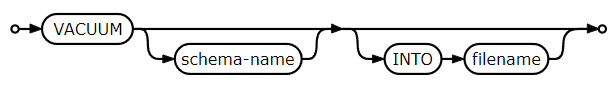

Не только сохраняет, но и уменьшает размер

In [21]:
%%sql
SELECT count(*) FROM Orders;

 * sqlite:///bigbase.db
Done.


count(*)
10150000


In [22]:
%%sql
VACUUM INTO 'base_backup.db';

 * sqlite:///bigbase.db
Done.


[]

In [23]:
%%sql
DELETE FROM Orders;
SELECT count(*) FROM Orders;

 * sqlite:///bigbase.db
10150000 rows affected.
Done.


count(*)
0


In [24]:
%%sql
VACUUM;

 * sqlite:///bigbase.db
Done.


[]

In [67]:
!rm base_backup.db #удаляет файл

In [25]:
%%sql
CREATE TRIGGER delete_warning BEFORE DELETE ON Orders
BEGIN
    SELECT RAISE(ABORT, "delete_warning: Проверь, что удаляешь, или сделай бэкап");
END;

 * sqlite:///bigbase.db
Done.


[]

In [30]:
%%sql
DELETE FROM Orders;
SELECT count(*) FROM Orders;

 * sqlite:///bigbase.db
(sqlite3.IntegrityError) delete_warning: Проверь, что удаляешь, или сделай бэкап
[SQL: DELETE FROM Orders;]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [28]:
%%sql
SELECT * FROM sqlite_master where name = 'delete_warning';

 * sqlite:///bigbase.db
Done.


type,name,tbl_name,rootpage,sql
trigger,delete_warning,Orders,0,"CREATE TRIGGER delete_warning BEFORE DELETE ON OrdersBEGIN SELECT RAISE(ABORT, ""delete_warning: Проверь, что удаляешь, или сделай бэкап"");END"


In [31]:
%%sql
DROP TRIGGER delete_warning;

 * sqlite:///bigbase.db
Done.


[]

Итого, доступные методы:
- транзакции (особенно при одиночной работе)
- триггеры
- backup